# Naive Bayes - Human Activity Recognisation Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_train = pd.read_csv('har_train.csv')
df_train.head()

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.41,8.07,-94.4,3,0.00,0.0,-0.02,-21,4,...,36,0.03,0.00,-0.02,192,203,-215,-17,654,476
1,A,1.41,8.07,-94.4,3,0.02,0.0,-0.02,-22,4,...,36,0.02,0.00,-0.02,192,203,-216,-18,661,473
2,A,1.42,8.07,-94.4,3,0.00,0.0,-0.02,-20,5,...,36,0.03,-0.02,0.00,196,204,-213,-18,658,469
3,A,1.48,8.05,-94.4,3,0.02,0.0,-0.03,-22,3,...,36,0.02,-0.02,0.00,189,206,-214,-16,658,469
4,A,1.45,8.06,-94.4,3,0.02,0.0,-0.02,-21,4,...,36,0.02,-0.02,-0.03,193,203,-215,-9,660,478


In [3]:
df_test = pd.read_csv("har_validate.csv")
df_test.head()

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,...,36,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0
1,A,1.45,8.17,-94.4,3,0.03,0.00,0.00,-21,4,...,36,0.02,0.00,-0.02,190,205,-215,-22,656.0,473.0
2,A,1.42,8.21,-94.4,3,0.02,0.00,-0.02,-22,4,...,36,0.00,-0.02,-0.03,193,202,-214,-14,659.0,478.0
3,A,1.48,8.15,-94.4,3,0.00,0.00,0.00,-21,4,...,36,0.02,0.00,0.00,194,204,-215,-13,656.0,471.0
4,A,1.51,8.12,-94.4,3,0.00,0.00,-0.02,-21,4,...,36,0.02,-0.02,0.00,192,204,-213,-13,653.0,481.0


In [4]:
df_train.shape

(13737, 53)

In [5]:
df_train.describe()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,...,13737.000000,13737.000000,13737.00000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000
mean,64.503131,0.191794,-10.941653,11.317973,-0.004831,0.040013,-0.130328,-5.424620,30.152362,-72.748271,...,34.717551,0.159878,0.06067,0.142131,-61.736915,163.438087,-55.328383,-311.819611,379.741210,391.859212
std,62.768030,22.363296,95.374331,7.744534,0.206729,0.078435,0.241559,29.697752,28.560242,100.410466,...,10.089365,0.629520,2.15904,0.601628,180.263200,200.714691,138.501162,346.766862,511.403542,370.396450
min,-28.900000,-54.900000,-180.000000,0.000000,-1.040000,-0.640000,-1.350000,-120.000000,-69.000000,-269.000000,...,0.000000,-3.360000,-7.02000,-8.090000,-498.000000,-585.000000,-410.000000,-1280.000000,-892.000000,-973.000000
25%,1.100000,1.670000,-88.300000,3.000000,-0.030000,0.000000,-0.200000,-21.000000,3.000000,-162.000000,...,29.000000,-0.220000,-1.46000,-0.180000,-178.000000,54.000000,-182.000000,-613.000000,-3.000000,187.000000
50%,114.000000,5.260000,-12.700000,17.000000,0.030000,0.020000,-0.100000,-15.000000,35.000000,-152.000000,...,36.000000,0.050000,0.03000,0.080000,-57.000000,200.000000,-39.000000,-378.000000,595.000000,509.000000
75%,123.000000,14.800000,13.600000,18.000000,0.110000,0.110000,-0.020000,-5.000000,61.000000,27.000000,...,41.000000,0.560000,1.64000,0.490000,76.000000,312.000000,26.000000,-72.000000,737.000000,652.000000
max,162.000000,60.300000,179.000000,28.000000,2.220000,0.640000,1.620000,83.000000,164.000000,105.000000,...,73.000000,3.520000,6.13000,4.310000,477.000000,589.000000,291.000000,666.000000,1480.000000,1090.000000


In [6]:
df_train.isnull().sum()

classe                  0
roll_belt               0
pitch_belt              0
yaw_belt                0
total_accel_belt        0
gyros_belt_x            0
gyros_belt_y            0
gyros_belt_z            0
accel_belt_x            0
accel_belt_y            0
accel_belt_z            0
magnet_belt_x           0
magnet_belt_y           0
magnet_belt_z           0
roll_arm                0
pitch_arm               0
yaw_arm                 0
total_accel_arm         0
gyros_arm_x             0
gyros_arm_y             0
gyros_arm_z             0
accel_arm_x             0
accel_arm_y             0
accel_arm_z             0
magnet_arm_x            0
magnet_arm_y            0
magnet_arm_z            0
roll_dumbbell           0
pitch_dumbbell          0
yaw_dumbbell            0
total_accel_dumbbell    0
gyros_dumbbell_x        0
gyros_dumbbell_y        0
gyros_dumbbell_z        0
accel_dumbbell_x        0
accel_dumbbell_y        0
accel_dumbbell_z        0
magnet_dumbbell_x       0
magnet_dumbb

In [7]:
X_train = df_train.drop('classe', axis=1)
y_train = df_train["classe"]

X_test = df_test.drop("classe", axis=1)
y_test = df_test["classe"]

In [8]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()


In [9]:
model.fit(X_train,y_train)

GaussianNB()

In [10]:
pred = model.predict(X_test)

[]

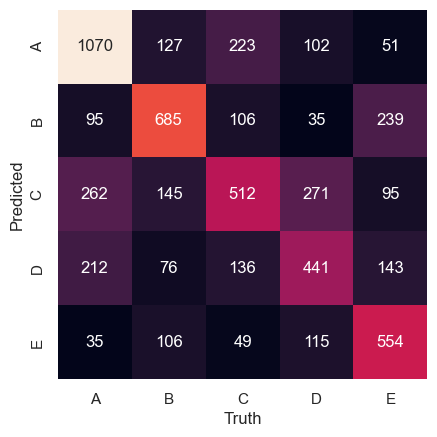

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
mat = confusion_matrix(pred, y_test)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.plot()

In [12]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           A       0.68      0.64      0.66      1674
           B       0.59      0.60      0.60      1139
           C       0.40      0.50      0.44      1026
           D       0.44      0.46      0.45       964
           E       0.64      0.51      0.57      1082

    accuracy                           0.55      5885
   macro avg       0.55      0.54      0.54      5885
weighted avg       0.57      0.55      0.56      5885

